In [84]:
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

# Question 4

In [85]:
s0 = 100
k = 100
t = 1
r = 0.1
sigma = 0.2

n_values = [2**i for i in range(0, 2)]

C0_values = []


for n in n_values:
    dt = t / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    
    p = (np.exp(r * dt) - d) / (u - d)
    
    S_values = np.array([s0 * u**j * d**(n - j) for j in range(n + 1)]) 
    # The above line makes a matrix of stock values
    
    C_values = np.maximum(0, S_values - k)
    #The above line makes a matrix of call option payoffs
    
    c0 = np.exp(-r * t) * np.sum(np.array([np.math.comb(n, j) * p**j * (1 - p)**(n - j) * C_values[j] for j in range(n + 1)]))
    
    C0_values.append(c0)

print("n_values:", n_values)
print("European (And American!) Call Option Values at time 0:")
for i, n in enumerate(n_values):
    print(f"n = {n}: {C0_values[i]}")

n_values: [1, 2]
European (And American!) Call Option Values at time 0:
n = 1: 14.25069537531316
n = 2: 12.319698919608822


In [86]:
C0_values = []
for n in n_values:
    dt = t / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    
    p = (np.exp(r * dt) - d) / (u - d)
    
    S_values = np.array([s0 * u**j * d**(n - j) for j in range(n + 1)]) 
    # The above line makes a matrix of stock values
    
    C_values = np.maximum(0, k-S_values)
    #The above line makes a matrix of call option payoffs
    
    c0 = np.exp(-r * t) * np.sum(np.array([np.math.comb(n, j) * p**j * (1 - p)**(n - j) * C_values[j] for j in range(n + 1)]))
    
    C0_values.append(c0)

print("n_values:", n_values)
print("European Put Option Values at time 0:")
for i, n in enumerate(n_values):
    print(f"n = {n}: {C0_values[i]}")

n_values: [1, 2]
European Put Option Values at time 0:
n = 1: 4.7344371789091095
n = 2: 2.8034407232047682


# Question 5

In [87]:
def blsc_price(s, k, r, t, sigma):
    d1_p1 = math.log(s/k)
    d1_p2 = (r + ((sigma**2)/2))*t
    d1_p3 = sigma * math.sqrt(t)
    d1 = (d1_p1 + d1_p2)/d1_p3
    d2 = d1 - (sigma*math.sqrt(t))

    t1 = norm.cdf(d1) * s
    t2 = norm.cdf(d2)
    t3 = k * math.exp(-r*t)
    return t1 - (t2*t3)
print("The Black-Scholes Price of the call option should be $", round(blsc_price(100, 100, 0.1, 1, 0.2), 2))

The Black-Scholes Price of the call option should be $ 13.27


### European Call

n_values: [1, 2, 4, 8, 16, 32, 64, 128]
European Call Option Values at time 0:
n = 1: 14.25069537531316
n = 2: 12.319698919608822
n = 4: 12.768397009236656
n = 8: 13.013324428182633
n = 16: 13.140257148984583
n = 32: 13.204683640826197
n = 64: 13.237112974069197
n = 128: 13.253378463533226


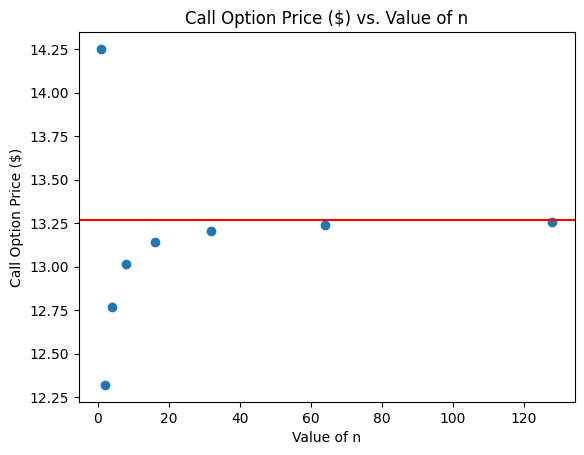

In [88]:
s0 = 100
k = 100
t = 1
r = 0.1
sigma = 0.2

n_values = [2**i for i in range(0, 8)]

C0_values = []


for n in n_values:
    dt = t / n
    u = np.exp(sigma * np.sqrt(dt))
    #print("u", u)
    d = 1 / u
    #print("d", d)
    
    p = (np.exp(r * dt) - d) / (u - d)
    #print("p", p)
    
    S_values = np.array([s0 * u**j * d**(n - j) for j in range(n + 1)]) 
    # The above line makes a matrix of stock values
    
    C_values = np.maximum(0, S_values - k)
    #The above line makes a matrix of call option payoffs
    
    c0 = np.exp(-r * t) * np.sum(np.array([np.math.comb(n, j) * p**j * (1 - p)**(n - j) * C_values[j] for j in range(n + 1)]))
    
    C0_values.append(c0)

print("n_values:", n_values)
print("European Call Option Values at time 0:")
for i, n in enumerate(n_values):
    print(f"n = {n}: {C0_values[i]}")

plt.scatter(n_values, C0_values)
plt.axhline(y = round(blsc_price(100, 100, 0.1, 1, 0.2), 2), color = 'r', linestyle = '-') 
# This horizontal line represents the Black-Scholes price of the call option
plt.xlabel("Value of n")
plt.ylabel("Call Option Price ($)")
plt.title("Call Option Price ($) vs. Value of n")
plt.show()


In [89]:
errors = ((C0_values - blsc_price(100, 100, 0.1, 1, 0.2))/blsc_price(100, 100, 0.1, 1, 0.2) )*100

errorsdf = pd.DataFrame({'n': n_values, 'Percent Error': errors})
errorsdf

,n,Percent Error
0,1,7.392937
1,2,-7.159011
2,4,-3.777632
3,8,-1.931864
4,16,-0.975302
5,32,-0.489785
6,64,-0.245399
7,128,-0.122822


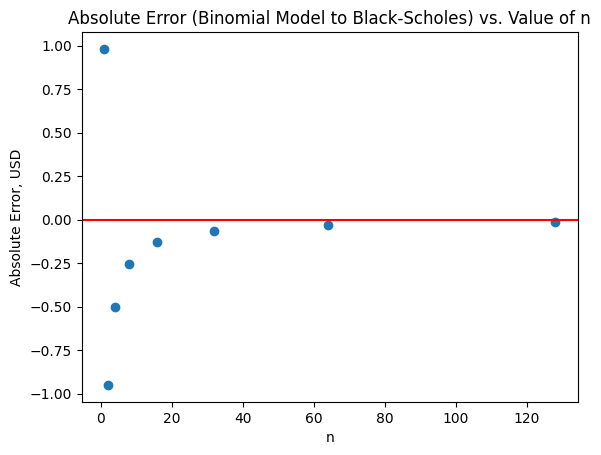

In [90]:
plt.scatter(n_values, (C0_values - blsc_price(100, 100, 0.1, 1, 0.2)))
plt.ylabel("Absolute Error, USD")
plt.xlabel("n")
plt.axhline(y = 0, color = 'r', linestyle = '-') 
plt.title("Absolute Error (Binomial Model to Black-Scholes) vs. Value of n")
plt.show()